In [1]:
import igraph as ig
import csv 
import cairo

import string
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('sociogram-employees-un.csv', header=None)
adjecency_list = df.values.tolist()

**1)** Load the data and create an unweighted directed graph from the adjacency matrix. Name the nodes as letters A to Y. Set node color to yellow and shape to sphere. Set the edge’s color to gray and arrow size to 0.2.

In [3]:
g = ig.Graph.Adjacency(adjecency_list, mode=ig.ADJ_DIRECTED)
g.layout = g.layout_circle(dim=3)
#Naming the nodes as letters A to Y.
g.vs["label"] = list(string.ascii_uppercase[:25])
#Setting node color to yellow
g.vs["color"] = "yellow"
#Setting shape to sphere.
g.vs["shape"] = "circle"

In [4]:
#Setting color of the vertex label to red
g.vs["label_color"] = "red"

g.es["color"] = "grey"
g.es["curved"] = "0.5"
g.es["arrow_size"] = "0.2" # #Size (length) of the arrowhead on the edge if the graph is directed, relative to 15 pixels.
g.es["arrow_width"] = "2" # # Width of the arrowhead on the edge if the graph is directed, relative to 10 pixels.


**2)** Plot the graph.

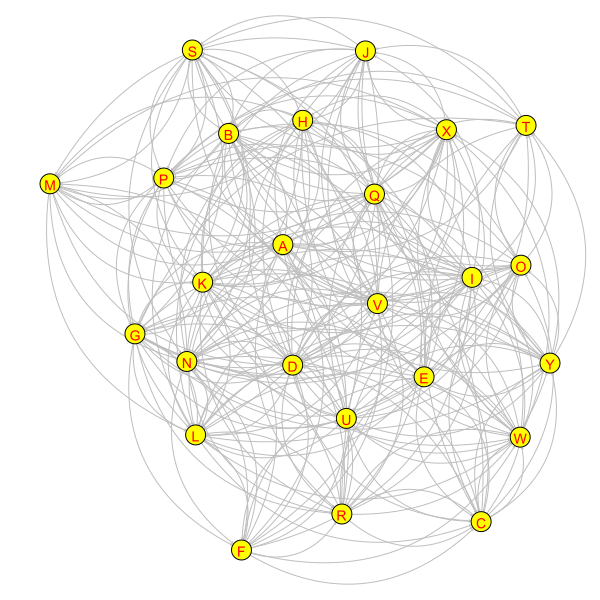

In [5]:
layout=g.layout_kamada_kawai(dim=2)
ig.plot(g, layout = layout, margin=50, vertex_size= 20)

In [6]:
g.write_svg("graph.svg", layout=layout)

**3)** Calculate network diameter and average closeness.

In [7]:
#Calculating network diameter
print("""Diameter: {}""".format(g.diameter()))
#Calculating average closeness
print("""Avg closeness: {}""".format(np.mean(g.closeness(mode=ig.IN,normalized=False))))

Diameter: 3
Avg closeness: 0.027346318638416352


**4)** Calculate average network betweenness.

In [8]:
#Calculating average network betweenness
print("""Avg betweenness: {}""".format(np.mean(g.betweenness())))

Avg betweenness: 13.04


**5)** Calculate network density and average degree.

In [9]:
# Density and avg degree
print("""Density: {}""".format(g.density()))
print("""Avg degree: {}""".format(np.mean(g.degree())))

Density: 0.46166666666666667
Avg degree: 22.16


**6)** Calculate network reciprocity and average transitivity.

In [10]:
# Reciprocity and avg transitivity
print("""Reciprocity: {}""".format(g.reciprocity()))
print("""Avg transitivity: {}""".format(g.transitivity_undirected()))
#print("""Avg transitivity: {}""".format(g.transitivity_avglocal_undirected())) # local

Reciprocity: 0.48375451263537905
Avg transitivity: 0.7145808736717828


**7)** Calculate average eccentricity of the vertices. What is the average distance between two nodes?

In [11]:
print("""Average eccentricity: {}""".format(np.mean(g.eccentricity())))

Average eccentricity: 2.04


In [12]:
# the average distance between two nodes -> Basically the same thing with average path length
np.mean(g.average_path_length())

1.5433333333333332

**8)** Find the hubs and plot graph with node’s size according to their hubs index. Which employee is the biggest hub?

In [13]:
# hubs
hubs = g.hub_score(scale=False, return_eigenvalue=False)
hubs

[0.2678092993474583,
 0.20023033123672546,
 0.18716524490157332,
 0.19606503338899522,
 0.20312695686022247,
 0.2414094688388279,
 0.20483749555611258,
 0.2236880762322418,
 0.17265231025006725,
 0.2328843643160094,
 0.23385990272667603,
 0.18815624134302894,
 0.20342270872559753,
 0.1686011862413456,
 0.16993578877952584,
 0.1967460103340367,
 0.17973768309864882,
 0.19825841928856058,
 0.142292008011774,
 0.16165749243972044,
 0.20015830170361806,
 0.20465601032655562,
 0.20912771218168175,
 0.13583257736524873,
 0.22253945908850936]

In [14]:
idx = np.argmax(hubs)
print("""The largest hub is node {}, with a score of {}""".format(g.vs["label"][idx], hubs[idx]))

The largest hub is node A, with a score of 0.2678092993474583


In [15]:
hubs100 = [i*100 for i in hubs]

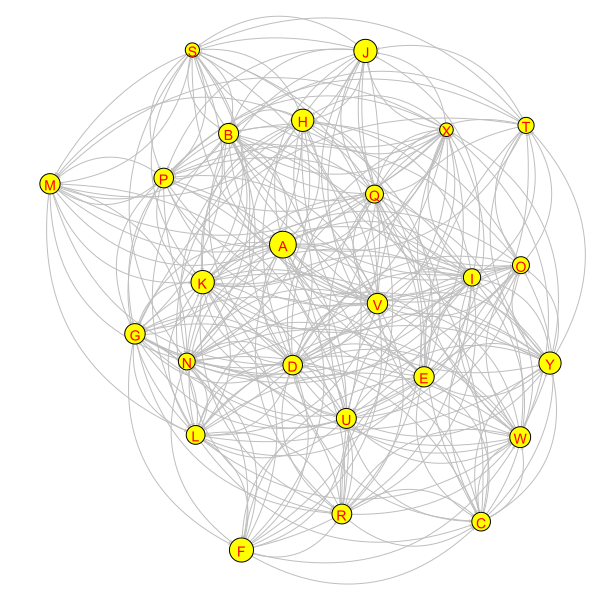

In [16]:
ig.plot(g, layout = layout, margin=50, vertex_size= hubs100)

**9)** Find the authorities and plot graph with node’s size according to their authority index. Which employee is the biggest authority?

In [17]:
authority_scores = g.authority_score(scale=False)
authority_scores

[0.14165236537890163,
 0.23262148916415903,
 0.16724379422049718,
 0.3427738930003503,
 0.13525671205275902,
 0.0652632550556973,
 0.1927399743717339,
 0.11196983455623533,
 0.25872570486110114,
 0.0912001642358391,
 0.23543580466563294,
 0.25255663336241546,
 0.09729197907147538,
 0.255441147366792,
 0.18826659943526872,
 0.16817249107273555,
 0.22064436343758406,
 0.1749322371057418,
 0.20450277686523305,
 0.08680452521947762,
 0.144867294902179,
 0.3051450643817399,
 0.18095177111865296,
 0.2760133878956486,
 0.15341335869707518]

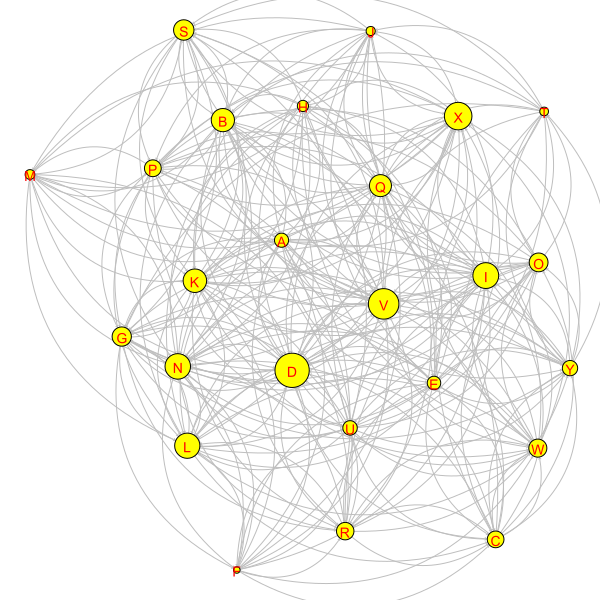

In [19]:
authority100 = [i*100 for i in authority_scores]
ig.plot(g, layout = layout, margin=30, vertex_size= authority100)

In [20]:
idx = np.argmax(authority_scores)
type(idx)
print("""The largest authority is node {}, with a score of {}""".format(g.vs["label"][idx], authority_scores[idx]))


The largest authority is node D, with a score of 0.3427738930003503


**10)** Show the nodes comprising the diameter. Plot these nodes larger and in red. Plot edges on this path thicker in red.

In [21]:
diam = g.get_diameter()
print("""the nodes comprising the diameter are {}""".format(diam))

the nodes comprising the diameter are [18, 1, 0, 19]


In [22]:
edges = [e.index for e in g.es for i in range(len(diam)-1) if e.tuple == (diam[i], diam[i+1])]  

g.es[edges]["color"] = "red"
g.es[edges]["width"] = 2
g.vs[diam]["color"] = "red"
g.vs[diam]["label_color"] = "black"

g.es["arrow_width"] = 0.5


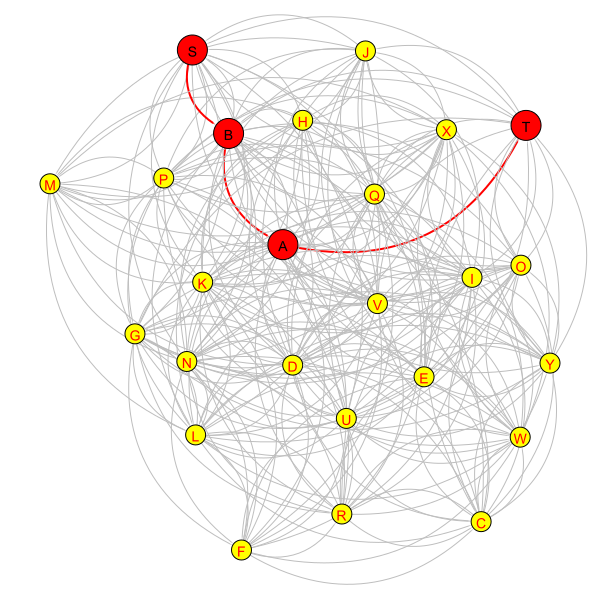

In [23]:
ig.plot(g, layout = layout, margin=50, vertex_size=[30 if i in diam else 20 for i in range(0,len(g.vs))] )

### Part 2: Now make an undirected graph from the same data, and use for the following exercises.

In [24]:
ug = ig.Graph.Adjacency(adjecency_list, mode=ig.ADJ_UNDIRECTED)

#Naming the nodes as letters A to Y.
ug.vs["label"] = list(string.ascii_uppercase[:25])
#Setting node color to yellow
ug.vs["color"] = "yellow"
#Setting shape to sphere.
ug.vs["shape"] = "circle"

#Setting color of the vertex label to red
ug.vs["label_color"] = "red"

ug.es["color"] = "grey"
ug.es["curved"] = "0.5"

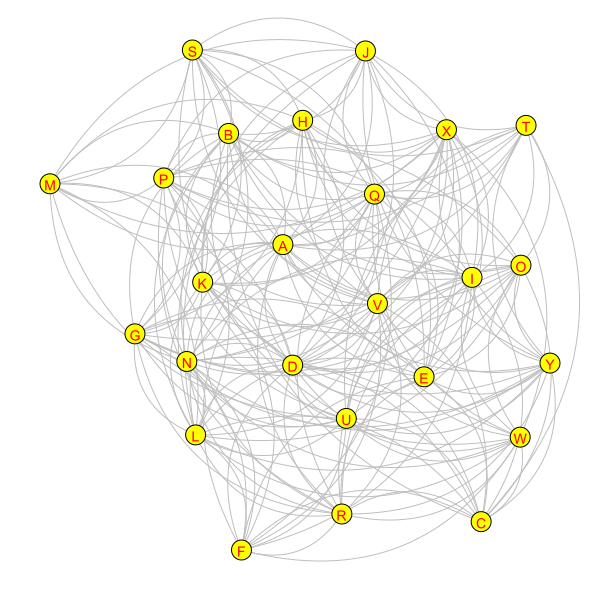

In [25]:
ig.plot(ug, layout = layout, margin=50)

**11)** Find the largest cliques in the group.

In [26]:
labels = list(string.ascii_uppercase[:25])

In [30]:
# find the larges clique in the graph
lcliques = ug.largest_cliques()[0]
lcliquesletter = g.vs[lcliques]["label"]

print("""The largest clique is {} with length {}""".format(lcliquesletter, ug.omega()))

The largest clique is ['D', 'A', 'K', 'V', 'I', 'Q', 'B', 'H', 'J', 'X'] with length 10


**12)** How many maximal cliques are there?

In [31]:
print("""The number of maximal cliques is {}""".format(len(ug.maximal_cliques())))

The number of maximal cliques is 128


**13)** Calculate the network cohesion.

In [32]:
coh = ug.cohesion() # Calculates the vertex connectivity of the graph or between some vertices.
print("""The network cohesion is {}""".format(coh))

The network cohesion is 13


**14)** Find the clusters based on betweenness.

In [34]:
vertex_dendo = ug.community_edge_betweenness(directed=False)
print(vertex_dendo)

Dendrogram, 25 elements, 24 merges

2 12 5 9 1 4 7 8 0 3 6 10 11 14 17 21 24 13 16 23 15 22 20 18 19
| |  | | | | | | | | | |  |  |  |  |  |  |  |  |  |  |  |  |  |
| |  | | | | | | | | | |  |  |  |  `--'  |  |  |  |  |  |  |  |
| |  | | | | | | | | | |  |  |  |   |    |  |  |  |  |  |  |  |
| |  | | | | | | | | | |  |  |  `---'    |  |  |  |  |  |  |  |
| |  | | | | | | | | | |  |  |    |      |  |  |  |  |  |  |  |
| |  | | | | | | | | | |  |  `----'      |  |  |  |  |  |  |  |
| |  | | | | | | | | | |  |    |         |  |  |  |  |  |  |  |
| |  | | | | | | | | | |  `----'         |  |  |  |  |  |  |  |
| |  | | | | | | | | | |    |            |  |  |  |  |  |  |  |
| |  | | | | | | | | | `----'            |  |  |  |  |  |  |  |
| |  | | | | | | | | |   |               |  |  |  |  |  |  |  |
| |  | | | | | | | | `---'               |  |  |  |  |  |  |  |
| |  | | | | | | | |   |                 |  |  |  |  |  |  |  |
| |  | | | | | | | `---'                 |  |  |  |  |  |  |  |
| |

In [45]:
vertex_cluster = vertex_dendo.as_clustering(n=vertex_dendo.optimal_count)
print(vertex_cluster.summary())

Clustering with 25 elements and 5 clusters


In [60]:
print('Cluster sizes:', vertex_cluster.sizes())
print('Clusters:')

for i, cl in enumerate(vertex_cluster):
    print("[{}] {}".format(i, g.vs[cl]["label"]))

Cluster sizes: [21, 1, 1, 1, 1]
Clusters:
[0] ['A', 'B', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'V', 'W', 'X', 'Y']
[1] ['C']
[2] ['S']
[3] ['T']
[4] ['U']


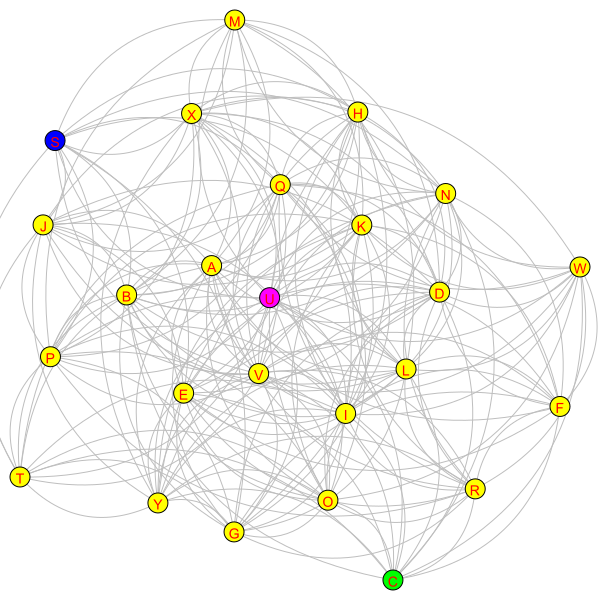

In [47]:
ig.plot(vertex_cluster)

**15)** Find the components of the graph.

In [59]:
# find the components of the graph
comp = ug.components()
for i, cl in enumerate(comp):
    print("[{}] {}".format(i, g.vs[cl]["label"]))

[0] ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y']


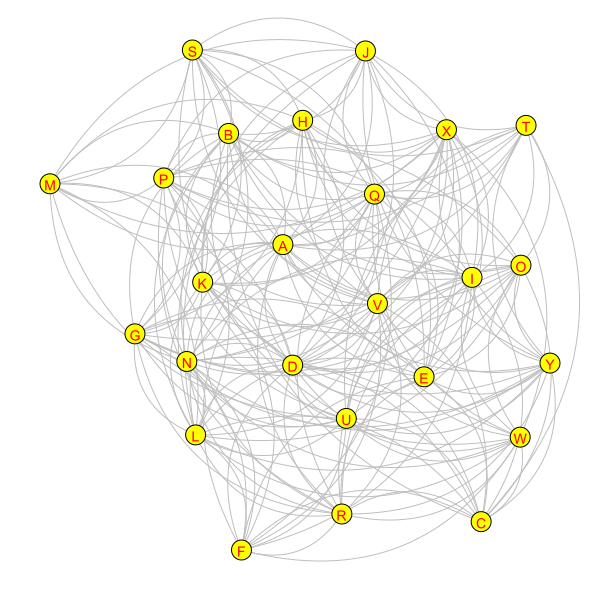

In [61]:
ig.plot(comp, layout = layout, margin=50 )

**16)** Find the loop edges.

In [62]:
#ug.is_loop()
print(type(ug.es))
for i in ug.es:
    if(i.is_loop() == True):
        print (i.is_loop())
    else:
        print("no loop edges")

<class 'igraph.EdgeSeq'>
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop edges
no loop e

**17)** How many triangles are there in the graph? In how many of them is vertex S included?

In [63]:
# I don't think this is correct. This way, we are counting some triangles multiple times, as a vertex could appear
# in more than one 3-clique.
# def triangles(g):
#     cliques = g.cliques(min=3, max=3)
#     result = [0] * g.vcount()
#     for i, j, k in cliques:
#         result[i] += 1
#         result[j] += 1
#         result[k] += 1
#     return result

In [66]:
# find the triangles (i.e. cliques of length 3). How many contains node S?
triangles = ug.cliques(min=3, max=3)
print("""The graph contains {} triangles""".format(len(triangles)))#sum(triangles(ug))))


The graph contains 807 triangles


In [38]:
s_triangles = [path for path in triangles if "S" in ug.vs[path]["label"]]
print("""The graph contains {} triangles involving node S""".format(len(s_triangles)))

The graph contains 63 triangles involving node S


**18)** What is the global clustering coefficient of this network? Can we say that clustering is statistically significant for this network? Tip: Check if the clustering coefficient is much larger than a random network with the same number of vertices and edges.

In [76]:
# what is the global clustering coefficient for this network?
cl_coeff = ug.transitivity_undirected()
print("""The global clustering coefficient is {}""".format(cl_coeff))
print("""Avg degree: {}""".format(np.mean(ug.degree())))
print("""Avg path length: {}""".format(ug.average_path_length()))

The global clustering coefficient is 0.7145808736717828
Avg degree: 4.0
Avg path length: 2.513333333333333


In [70]:
#Generating random network
rg = ig.Graph.Erdos_Renyi(n=ug.vcount(), m=ug.ecount(), directed=False)
rgtrans = rg.transitivity_undirected()
print("""The global clustering coefficient for random graph is {}""".format(rgtrans))
print("""Avg degree: {}""".format(np.mean(rg.degree())))
print("""Avg path length: {}""".format(rg.average_path_length()))

The global clustering coefficient for random graph is 0.6984597156398105


Compared with a random network, the coefficient of network is slightly greater than the random networks coefficient. Thus, we can conclude that clustering is not statistically significant for this network.

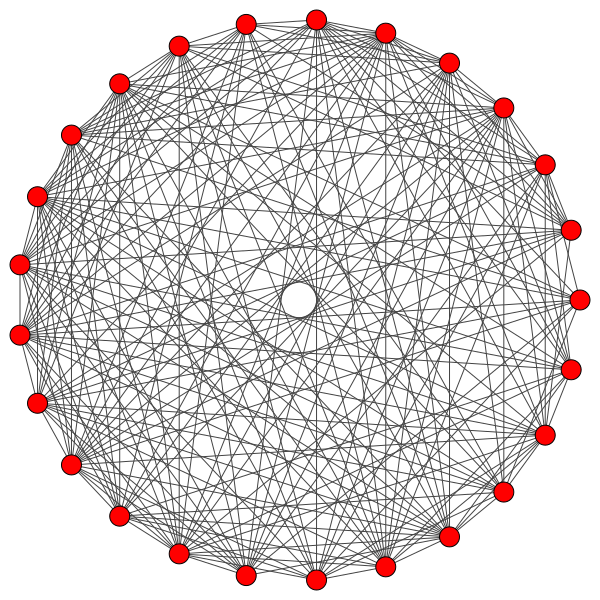

In [75]:
ig.plot(rg, layout='circle')

**19)** Make and graph a small-world network.

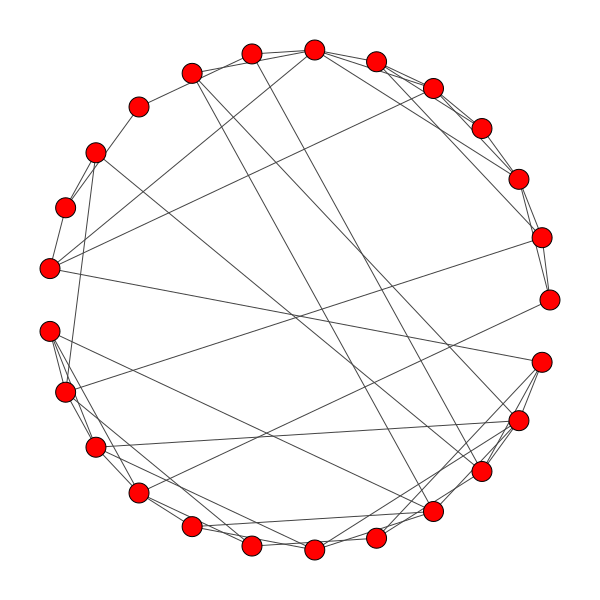

In [72]:
small_world = ig.Graph.Watts_Strogatz(dim=1, size=ug.vcount(), nei=2, p=0.2)
ig.plot(small_world, layout = 'circle', margin=50)

In [74]:
print("""Clustering coefficient for the small world network: {}""".format(small_world.transitivity_undirected()))
print("""Avg degree: {}""".format(np.mean(small_world.degree())))
print("""Avg path length: {}""".format(small_world.average_path_length()))

Clustering coefficient for the small world network: 0.25609756097560976
Avg degree: 4.0
Avg path length: 2.513333333333333
